# Classify mushrooms using Deep Learning

My goal is to classify mushrooms into two groups: edible and deadly. I will explore the data, examine some well-known mushroom picking tips and build a deep learning model.

## Table of contents
1. [Introduction](#section-one)
2. [Exploring](#section-two)
3. [Preprocessing](#section-three)
4. [Building a model](#section-four)
5. [Validation](#section-five)
6. [Final result](#section-six)

<a id="section-one"></a>
# 1. Introduction

## Libraries

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data explanation
* **class**: edible=e,poisonous=p
* **cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* **cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s
* **cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* **bruises**: bruises=t,no=f
* **odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* **gill-attachment**: attached=a,descending=d,free=f,notched=n
* **gill-spacing**: close=c,crowded=w,distant=d
* **gill-size**: broad=b,narrow=n
* **gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* **stalk-shape**: enlarging=e,tapering=t
* **stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* **stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s
* **stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s
* **stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* **stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* **veil-type**: partial=p,universal=u
* **veil-color**: brown=n,orange=o,white=w,yellow=y
* **ring-number**: none=n,one=o,two=t
* **ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* **spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* **population**: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* **habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [5]:
mushrooms = pd.read_csv('mushrooms.csv')
print('There are {} mushroom descriptions, each with {} features'.format(len(mushrooms), len(mushrooms.columns)))

There are 8124 mushroom descriptions, each with 23 features


<a id="section-two"></a>
# 2. Exploring the data

In [6]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There are no null values, which is great news for me

In [7]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


All values are categorical

For plot readability I'm going to map a couple of features to full names.

In [8]:
colors_dict = {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
               'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 
               'w': 'white', 'y': 'yellow', 'k': 'black', 'h': 'chocolate', 
               'o': 'orange', }

odor_dict = {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 
             'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 
             's': 'spicy'}

population_dict = {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered',
                   'v': 'several', 'y': 'solitary'}

habitat_dict = {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 
                'u': 'urban', 'w': 'waste', 'd': 'woods'}


# Map colors
for feature_name in ['cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'spore-print-color']:
    mushrooms[feature_name] = mushrooms[feature_name].map(colors_dict)
    
# Map smells
mushrooms['odor'] = mushrooms['odor'].map(odor_dict)

# Map population
mushrooms['population'] = mushrooms['population'].map(population_dict)

# Map habitat
mushrooms['habitat'] = mushrooms['habitat'].map(habitat_dict)

# Map class
mushrooms['class'] = mushrooms['class'].map({'e': 1., 'p': 0.})
mushrooms = mushrooms.rename({'class': 'edible'}, axis='columns')

In [9]:
mushrooms.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.0,x,s,brown,t,pungent,f,c,n,black,...,s,white,white,p,w,o,p,black,scattered,urban
1,1.0,x,s,yellow,t,almond,f,c,b,black,...,s,white,white,p,w,o,p,brown,numerous,grasses
2,1.0,b,s,white,t,anise,f,c,b,brown,...,s,white,white,p,w,o,p,brown,numerous,meadows
3,0.0,x,y,white,t,pungent,f,c,n,brown,...,s,white,white,p,w,o,p,black,scattered,urban
4,1.0,x,s,gray,f,none,f,w,b,black,...,s,white,white,p,w,o,e,brown,abundant,grasses


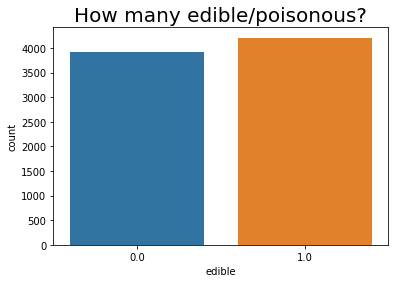

In [10]:
sns.countplot(x='edible', data=mushrooms);
plt.title('How many edible/poisonous?', fontsize=20);

It is explicity stated in the dataset description that there is no simple rule for determining the edibility of a mushroom. However, there a couple ground rules that can decrease the probability of picking poisonous mushrooms. 

According to these articles: [How to Tell the Difference Between Poisonous and Edible Mushrooms](https://www.wildfooduk.com/articles/how-to-tell-the-difference-between-poisonous-and-edible-mushrooms/), [How to Identify Poisonous Mushrooms](https://sciencing.com/identify-poisonous-mushrooms-2057768.html) mushrooms with following features shouldn't be picked: 
* white gills,
* a skirt or ring on the stem,
* bulbous or sack like base called volva,
* red color on the cap or stem,
* unpleasant smell,
* white spore print color.

Additionaly I'd like to analyse 'population' and 'habitat' features.
    
Let's explore those rules.

## White gills
<img src="https://nature.mdc.mo.gov/sites/default/files/media/images/2013/05/meadow_mushroom_05-01-13.jpg" align = "left" width="400px">

In [11]:
pd.crosstab(mushrooms['gill-color'], mushrooms['edible'])

edible,0.0,1.0
gill-color,,
black,64,344
brown,112,936
buff,1728,0
chocolate,528,204
gray,504,248
green,24,0
orange,0,64
pink,640,852
purple,48,444


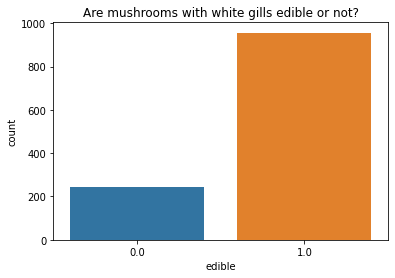

In [12]:
sns.countplot(x='edible', data=mushrooms[mushrooms['gill-color'] == 'white']);
plt.title('Are mushrooms with white gills edible or not?');

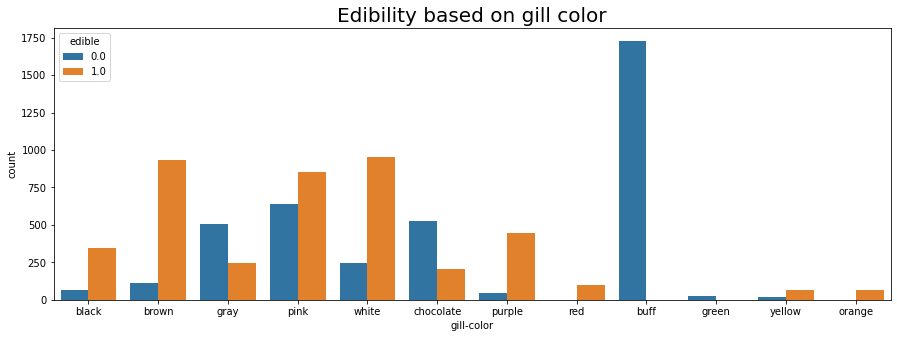

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x='gill-color', data=mushrooms, hue='edible');
plt.title('Edibility based on gill color', fontsize=20);

White gills rule are not a good indicator for poisonous mushrooms in this dataset; most of mushrooms with this feature are actually edible. However, all mushrooms with either buff or green gills are labeled as poisonous. All orange and red are edible.

## Skirt/ring on the stem
<img src="https://www.backyardnature.net/n/09/091018mw.jpg" align = "left" width="400px">


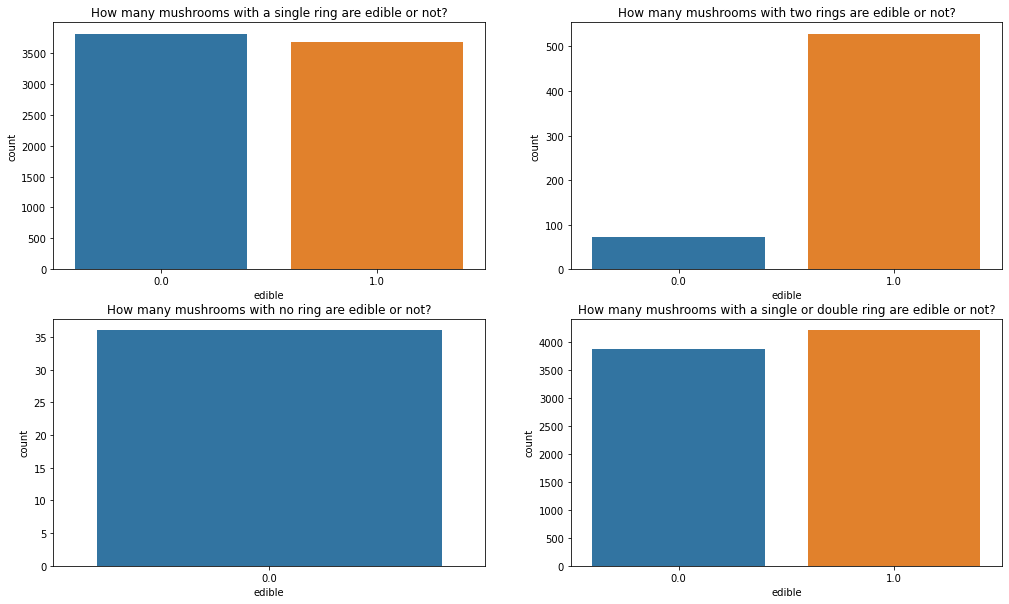

In [14]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='edible', data=mushrooms[mushrooms['ring-number'] == 'o']);
plt.title('How many mushrooms with a single ring are edible or not?');

plt.subplot(2, 2, 2)
sns.countplot(x='edible', data=mushrooms[mushrooms['ring-number'] == 't']);
plt.title('How many mushrooms with two rings are edible or not?');

plt.subplot(2, 2, 3)
sns.countplot(x='edible', data=mushrooms[mushrooms['ring-number'] == 'n']);
plt.title('How many mushrooms with no ring are edible or not?');

plt.subplot(2, 2, 4)
sns.countplot(x='edible', data=mushrooms[mushrooms['ring-number'] != 'n']);
plt.title('How many mushrooms with a single or double ring are edible or not?');

In general ring presence doesn't say much about the edibility of a mushroom. All mushrooms without a ring are poisonous, however there are only 35-36 of them in the dataset. Majority of double-ringed mushrooms are edible.

## Stem base
<img src="https://www.mushroom.world/data/fungi/Amanitaporphyria3.JPG" align = "left" width="400px">

In [15]:
pd.crosstab(mushrooms['stalk-root'], mushrooms['edible'])

edible,0.0,1.0
stalk-root,,
?,1760,720
b,1856,1920
c,44,512
e,256,864
r,0,192


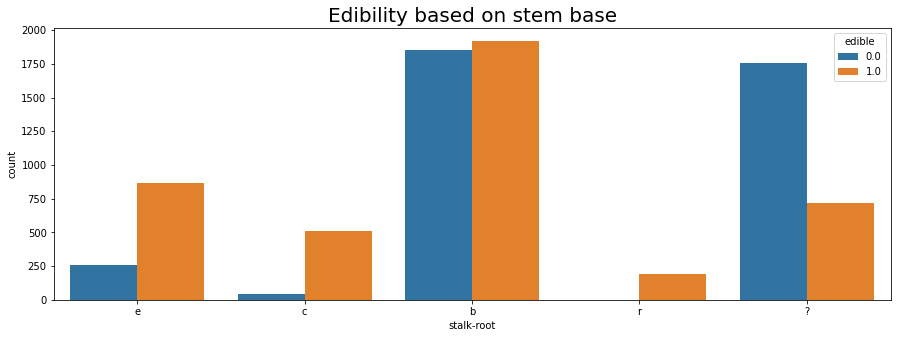

In [16]:
plt.figure(figsize=(15, 5))
sns.countplot(x='stalk-root', data=mushrooms, hue='edible');
plt.title('Edibility based on stem base', fontsize=20);

## Red color
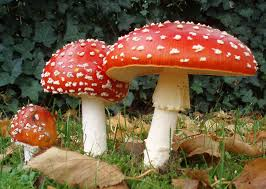


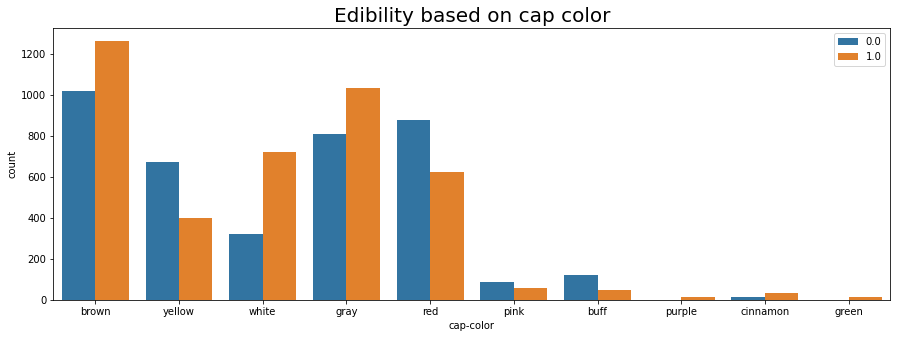

In [17]:
plt.figure(figsize=(15, 5))
sns.countplot(x='cap-color', data=mushrooms, hue='edible');
plt.legend(loc='upper right');
plt.title('Edibility based on cap color', fontsize=20);

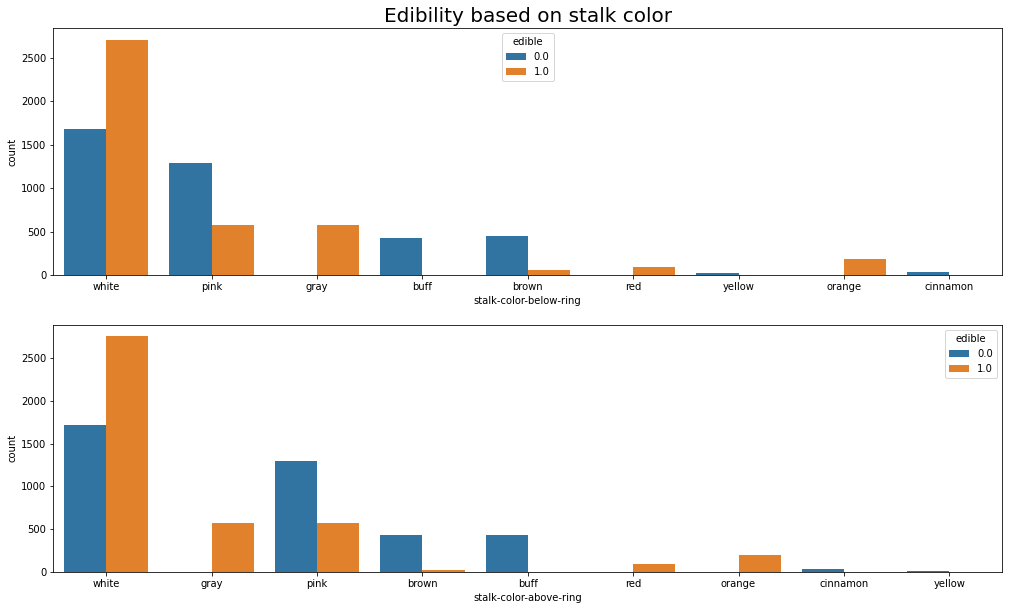

In [18]:
plt.figure(figsize=(17, 10))
plt.subplot(2, 1, 1)
sns.countplot(x='stalk-color-below-ring', data=mushrooms, hue='edible');
plt.title('Edibility based on stalk color', fontsize=20);
plt.subplot(2, 1, 2)
sns.countplot(x='stalk-color-above-ring', data=mushrooms, hue='edible');

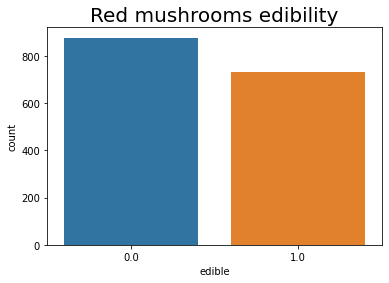

In [19]:
red_mushrooms = mushrooms[(mushrooms['stalk-color-above-ring'] == 'red') | (mushrooms['stalk-color-below-ring'] == 'red') | (mushrooms['cap-color'] == 'red')]
sns.countplot(x='edible', data=red_mushrooms);
plt.title('Red mushrooms edibility', fontsize=20);

## Smell

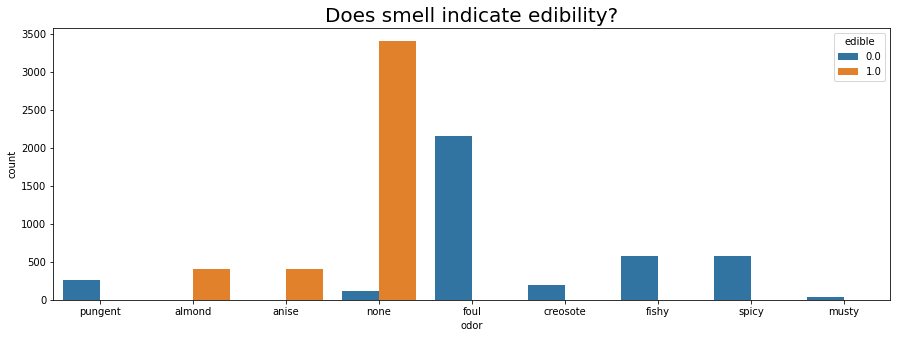

In [20]:
plt.figure(figsize=(15, 5));
sns.countplot(x='odor', data=mushrooms, hue='edible');
plt.title('Does smell indicate edibility?', fontsize=20);

In [21]:
bad_smell = (mushrooms['odor'] != 'almond') & (mushrooms['odor'] != 'anise') & (mushrooms['odor'] != 'none')
bad_smell_mushrooms = mushrooms[bad_smell]
print('{} poisonous mushrooms can be excluded based on smell'.format(len(bad_smell_mushrooms)))

3796 poisonous mushrooms can be excluded based on smell


## Spore print color
<img src="https://3.bp.blogspot.com/-i8hYDRyxPfo/UJweQWQD6qI/AAAAAAAAAIc/anGRwJSMAcs/s1600/spore-prints.jpg" align = "left" width="400px">


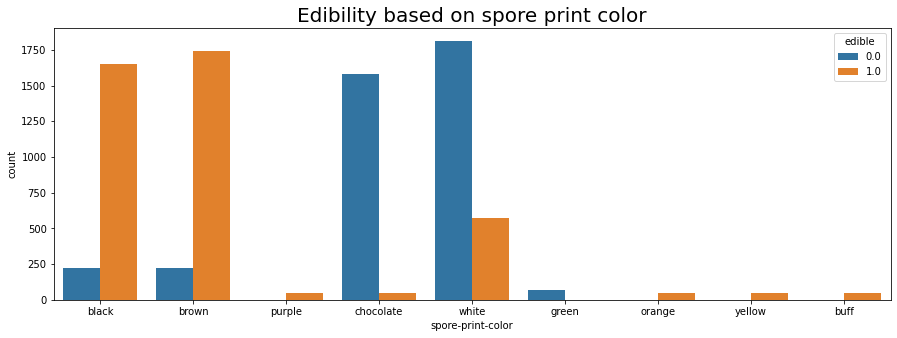

In [22]:
plt.figure(figsize=(15, 5))
sns.countplot(x='spore-print-color', data=mushrooms, hue='edible');
plt.title('Edibility based on spore print color', fontsize=20);

## Population

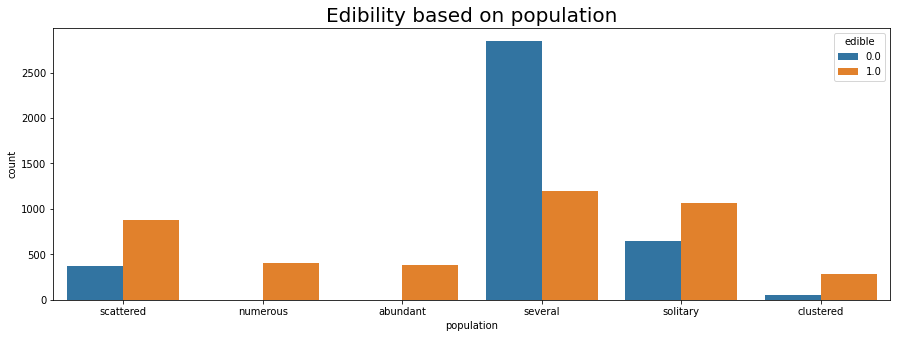

In [23]:
plt.figure(figsize=(15, 5))
sns.countplot(x='population', data=mushrooms, hue='edible');
plt.title('Edibility based on population', fontsize=20);

## Habitat

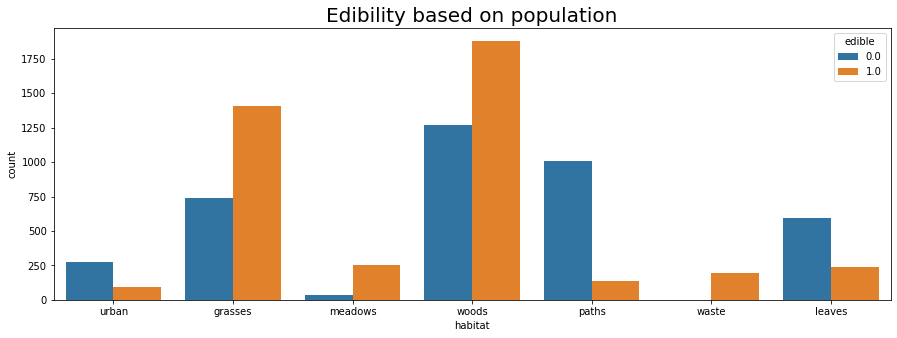

In [24]:
plt.figure(figsize=(15, 5))
sns.countplot(x='habitat', data=mushrooms, hue='edible');
plt.title('Edibility based on population', fontsize=20);

## Baseline
In order to establish a baseline for the model I'm going to label mushrooms as poisonous if at least one of the following features is present:
* chocolate/white spore print color
* smell other than anise, almond or none
* puff/brown stalk color
* buff gill color

Based on the predicted data I'm going to create a confusion matrix and calculate accuracy.

In [25]:
bad_spore_print = (mushrooms['spore-print-color'] == 'white') | (mushrooms['spore-print-color'] == 'chocolate')
bad_stalk_color = ((mushrooms['stalk-color-above-ring'] == 'puff') | (mushrooms['stalk-color-below-ring'] == 'puff')) | ((mushrooms['stalk-color-above-ring'] == 'brown') | (mushrooms['stalk-color-below-ring'] == 'brown'))
bad_gill_color = (mushrooms['gill-color'] == 'buff')

mushrooms_negatives = mushrooms[bad_spore_print | bad_smell | bad_gill_color | bad_stalk_color]
mushrooms_positives = pd.concat([mushrooms, mushrooms_negatives]).drop_duplicates(keep=False)

total = len(mushrooms)

false_negatives = len(mushrooms_negatives[mushrooms_negatives['edible'] == 0.])
true_negatives = len(mushrooms_negatives[mushrooms_negatives['edible'] == 1.])

false_positives = len(mushrooms_positives[mushrooms_positives['edible'] == 0.])
true_positives = len(mushrooms_positives[mushrooms_positives['edible'] == 1.])

confusion_matrix = pd.DataFrame({'1': [true_positives, false_negatives], '0': [false_positives, true_negatives]}, index=['1', '0'])

print(confusion_matrix)
print('Accuracy = {:.1f}%'.format(100 * (true_positives + true_negatives) / total))
print('Recall = {:.1f}%'.format(100 * true_positives / (true_positives + false_negatives)))
print('Precision = {:.1f}%'.format(100 * true_positives / (true_positives + false_positives)))

      1    0
1  3584   72
0  3844  624
Accuracy = 51.8%
Recall = 48.2%
Precision = 98.0%


<a id="section-three"></a>
# 3. Preprocessing

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
mushrooms_preprocessed = pd.get_dummies(mushrooms)
mushrooms_preprocessed.head()

,edible,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0.0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1.0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1.0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [28]:
X = mushrooms_preprocessed.drop(['edible'], axis=1).values.astype(np.float64, copy=False)
y = mushrooms_preprocessed['edible'].values

n = len(X)

X_train, y_train = X[:int(0.6 * n)], y[:int(0.6 * n)]
X_val, y_val = X[int(0.6 * n) + 1: int(0.8 * n)], y[int(0.6 * n) + 1: int(0.8 * n)]
X_test, y_test = X[int(0.8 * n) + 1:], y[int(0.8 * n) + 1:]

<a id="section-four"></a>
# 4. Building a model

In [29]:
from keras import models
from keras import layers

In [30]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,
                   y_train,
                   epochs=20,
                   batch_size=32,
                   validation_data=(X_val, y_val),
                   verbose=0)

<a id="section-five"></a>
# 5. Validation

In [31]:
def plot_loss(epochs, loss_values, val_loss_values):
  plt.clf()
  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

def plot_accuracy(epochs, acc_values, val_acc_values):
  plt.clf()
  plt.plot(epochs, acc_values, 'bo', label='Training acc')
  plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

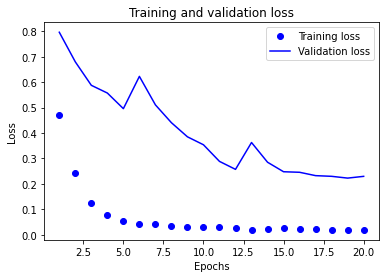

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plot_loss(epochs, loss, val_loss)

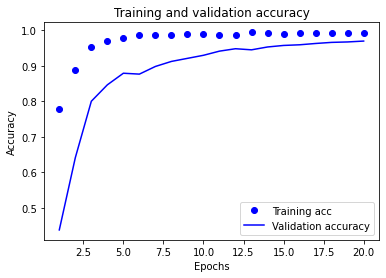

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_accuracy(epochs, acc, val_acc)

<a id="section-six"></a>
# 6. Final result

In [34]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 2ms/step - loss: 1.6648 - accuracy: 0.8621


In [35]:
final_loss, final_accuracy = model.evaluate(X, y)

254/254 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.9661
